In [3]:
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)

# Ref: https://stackoverflow.com/questions/48610132/
#      tensorflow-crash-with-cudnn-status-alloc-failed/53707323#53707323
# gpus = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_virtual_device_configuration(gpus[0], 
#   [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3096)])

2.17.0-dev20240601
3.4.1.dev2024071703


In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype(np.float32) / 255
test_images = test_images.astype(np.float32) / 255

In [7]:
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [9]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, input_shape=(28, 28, 1)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,384,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,385,482 (5.29 MB)

 Trainable params: 1,385,482 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
hist = model.fit(train_images, train_labels, batch_size=256, 
                 validation_data=(test_images, test_labels), epochs=50)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - accuracy: 0.6500 - loss: 0.9769 - val_accuracy: 0.8400 - val_loss: 0.4257
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - accuracy: 0.8237 - loss: 0.5002 - val_accuracy: 0.8633 - val_loss: 0.3616
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - accuracy: 0.8502 - loss: 0.4224 - val_accuracy: 0.8784 - val_loss: 0.3330
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - accuracy: 0.8633 - loss: 0.3817 - val_accuracy: 0.8860 - val_loss: 0.3130
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - accuracy: 0.8729 - loss: 0.3555 - val_accuracy: 0.8912 - val_loss: 0.2968
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8806 - loss: 0.3299 - val_accuracy: 0.8930 - val_loss: 0.2940
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8826 - loss: 0.3173 - val_accuracy: 0.8938 - val_loss: 0.2909
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.8937 - loss: 0.2981 - 

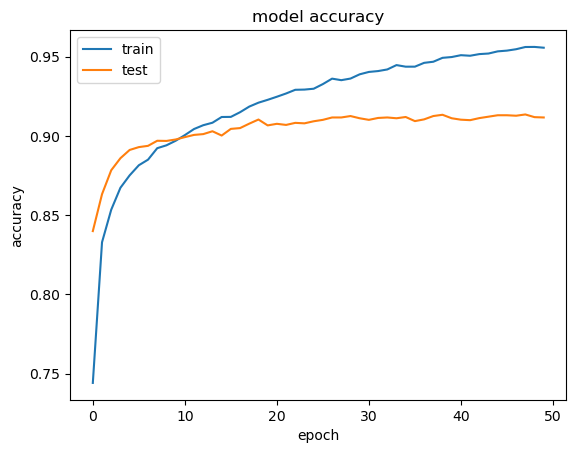

In [15]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

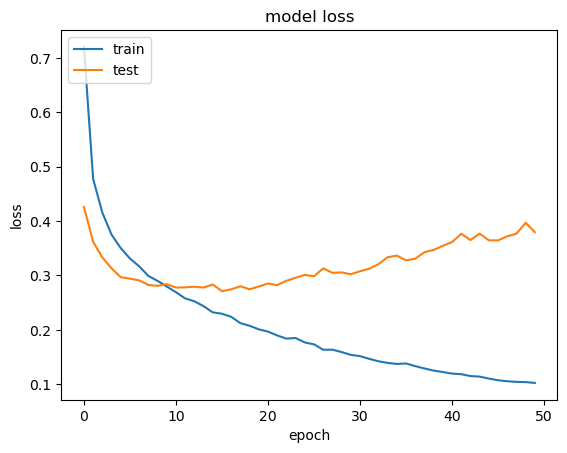

In [17]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

เมื่อเราลองใช้ dropout จะเห็นได้ว่าโมเดลของเรานั้นมีความ regularize มากขึ้นอย่างเห็นได้ชัด <br>
มีความแม่นยำมากขึ้นเมื่อเจอข้อมูลที่ไม่เคยเห็นมาก่อน

***ทีนี้มาดูกันต่อว่า ถ้า dropout 2 ครั้งจะได้ผลเป็นอย่างไรบ้าง ดูไฟล์ Convolution + Dense 64 + Dropout-Twice at 05***